#### 1. Найти решение системы уравнений
$$
\begin{cases}
x^2 + y^2 + z^2 &= 1, \\
2x^2 + y^2 -4z &= 0, \\
3x^2 - 4y + z^2 &= 0
\end{cases}
$$

In [148]:
import numpy as np
import sympy as sym

v7s = ['x', 'y', 'z']
fns = [
    'x ** 2 + y ** 2 + z ** 2 - 1',
    '2 * x ** 2 + y ** 2 - 4 * z',
    '3 * x ** 2 - 4 * y + z ** 2'
]

f = sym.Matrix(fns)
jacobian = f.jacobian(v7s)

f = sym.lambdify(sym.symbols(v7s), f)
jacobian = sym.lambdify(sym.symbols(v7s), jacobian)

#### Система уравнений в матричном виде:
$$\left[\begin{matrix}x^{2} + y^{2} + z^{2} - 1\\2 x^{2} + y^{2} - 4 z\\3 x^{2} - 4 y + z^{2}\end{matrix}\right]$$

#### Её якобиан:
$$\left[\begin{matrix}2 x & 2 y & 2 z\\4 x & 2 y & -4\\6 x & -4 & 2 z\end{matrix}\right]$$

In [149]:
# Строим графики в геогебре; смотрим, где примерно корни
start_approx_1 = np.array([0.5, 0.5, 0.5])
start_approx_2 = np.array([-0.5, 0.5, 0.5])

def solve_newton(matrix_fn, func, start_approx, eps=1e-3):
    n_vars = len(start_approx)
    coefs = matrix_fn(*start_approx)
    fn_values = -func(*start_approx)
    
    deltas = np.linalg.solve(coefs, fn_values).reshape((n_vars,))
    
    approx = start_approx + deltas
    
    while any(map(lambda x: abs(x) >= eps, deltas / approx)):
        coefs = matrix_fn(*approx)
        fn_values = -func(*approx)
    
        deltas = np.linalg.solve(coefs, fn_values).reshape((n_vars,))
    
        approx += deltas
    
    return approx

s1 = solve_newton(jacobian, f, start_approx_1)
s2 = solve_newton(jacobian, f, start_approx_2)

print(s1, s2)

[[ 1.  1.  1.]
 [ 2.  1. -4.]
 [ 3. -4.  1.]] [[0.25]
 [1.25]
 [1.  ]]
[[-1.  1.  1.]
 [-2.  1. -4.]
 [-3. -4.  1.]] [[0.25]
 [1.25]
 [1.  ]]
[0.78519693 0.49661139 0.36992283] [-0.78519693  0.49661139  0.36992283]


#### 2. При заданном значении функции Лапласа $ \Phi(x) $ найти её аргумент $ x $
$$
\Phi(x) = \frac{2}{\sqrt{2\pi}}\int_{0}^{x} \exp(-t^2 / 2) dt.
$$

In [131]:
import numpy as np
from scipy.interpolate import interp1d

def f(t):
    return 2 / np.sqrt(2 * np.pi) * np.exp(-t ** 2 / 2)

def integrate_simpson(func, a, b, n=200):
    h = (b - a) / (n*2)
    
    xs = np.array([a + i * h for i in range(n*2 + 1)])
    ys = np.array([func(x) for x in xs])
    
    s1 = 4 * np.sum([ys[2*i - 1] for i in range(1, n)])
    s2 = 2 * np.sum([ys[2*i] for i in range(1, n - 1)])
    s = (h / 3) * (ys[0] + s1 + s2 + ys[-1])
    
    return s

def laplace(x):
    return integrate_simpson(f, 0, x)

def get_x_from_laplace_value(value):
    xs = np.linspace(-2, 2, num=1000)
    ys = np.array([laplace(x) for x in xs])
    
    return interp1d(ys, xs)(value)

print(get_x_from_laplace_value(0.9))

1.65314102989162


#### 3.1. Решить численно краевую задачу для дифференциального уравнения
$$
\begin{cases}
y'' - y^3 = x^2, \\
0 \leq x \leq 1, \\
x = 0, y = 1, \\
x = 1, y = 3.
\end{cases}
$$
#### 3.2. Построить график зависимости $ y(x) $

[1.         1.05927886 1.13054359 1.2166581  1.32168225 1.45139406
 1.61418006 1.82262467 2.09651609 2.46895732 3.        ]


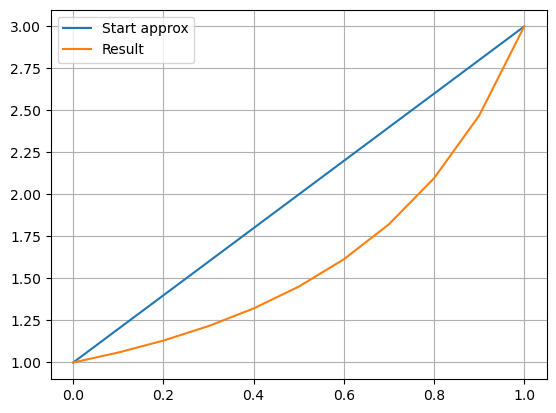

In [175]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

n = 10
h = 1 / n

variables = [f'y{i}' for i in range(n + 1)]

x0, xn = 0, 1
y0, yn = 1, 3

x = np.linspace(x0, xn, n + 1, endpoint=True)

functions = [f'y0 - {y0}'] + [
    f'y{i - 1} - 2 * y{i} + y{i + 1} - {h} ** 2 * ({x[i]} ** 2 + y{i} ** 3)'
    for i in range(1, n)
] + [f'y{n} - {yn}']

f = sym.Matrix(functions)
jacobian = f.jacobian(variables)

f = sym.lambdify(sym.symbols(variables), f)
jacobian = sym.lambdify(sym.symbols(variables), jacobian)

def solve_newton(matrix_fn, func, start_approx, eps=1e-3):
    n_vars = len(start_approx)
    coefs = matrix_fn(*start_approx)
    fn_values = -func(*start_approx)
    
    deltas = np.linalg.solve(coefs, fn_values).reshape((n_vars,))
    
    approx = start_approx + deltas
    
    while any(map(lambda x: abs(x) >= eps, deltas / approx)):
        coefs = matrix_fn(*approx)
        fn_values = -func(*approx)
    
        deltas = np.linalg.solve(coefs, fn_values).reshape((n_vars,))
    
        approx += deltas
    
    return approx

tan = (yn - y0) / (xn - x0)
start_approx = [y0 + tan * i * h for i in range(n + 1)]

s = solve_newton(jacobian, f, start_approx)

print(s)

plt.plot(x, start_approx, label="Start approx")
plt.plot(x, s, label="Result")
plt.legend()
plt.grid()
plt.show()